In [1]:
import re
import math
import random
from matplotlib import pyplot as plt

In [2]:
smallLetters = "abcdefghijklmnopqrstuvwxyz"
capitalLetters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
symbols = " ,.?!-()"
alphabet = smallLetters + capitalLetters + symbols

In [3]:
path = '/usr/share/dict/words'

dictionaryFile = open(path, 'r')
words = dictionaryFile.read().splitlines()
dictionary = set(words)
print(len(dictionary))

104334


In [4]:
f = open('Ciphertext_Assignment_3.txt', 'r')
cipherTextList = [eval(line) for line in f.readlines()]
f.close()
for i in range(len(cipherTextList)):
    cipherTextList[i].insert(0, 0)
print(*cipherTextList, sep = '\n')

[0, 32, 14, 162, 166, 143, 97, 199, 84, 128, 186, 67, 246, 43, 37, 76, 222, 75, 131, 131, 185, 79, 149, 100, 201, 116, 219, 101, 188, 112, 206, 25, 63, 147, 142, 153, 112, 190, 67, 231, 37, 246, 85, 249, 123, 161, 135, 215, 124, 193, 143, 135, 201, 67, 237, 54, 246, 74, 196, 77, 80]
[0, 39, 0, 27, 44, 224, 51, 18, 23, 10, 43, 233, 81, 198, 215, 123, 142, 182, 124, 137, 167, 108, 187, 67, 244, 104, 192, 128, 151, 142, 174, 124, 225, 32, 250, 13, 90, 212, 35, 82, 206, 41, 3, 33, 236, 84, 242, 7, 60, 0, 21, 20, 36, 167, 143, 136, 201, 104, 164, 119, 218]
[0, 36, 10, 29, 37, 8, 28, 68, 254, 37, 16, 233, 93, 197, 133, 236, 29, 5, 36, 253, 57, 138, 216, 26, 34, 58, 82, 169, 192, 66, 8, 22, 123, 140, 135, 140, 137, 158, 96, 200, 64, 219, 111, 217, 82, 252, 100, 164, 158, 186, 155, 108, 193, 75, 254, 38, 167, 159, 105, 184, 157]
[0, 35, 6, 19, 53, 170, 127, 168, 114, 203, 116, 131, 188, 100, 181, 139, 153, 140, 136, 220, 78, 218, 52, 196, 114, 170, 203, 159, 246, 47, 18, 17, 56, 201, 64, 207, 

In [5]:
validPads = []

for col in range(1, len(cipherTextList[0])):
    pads = []
    for pad in range(1 << 8):
        found = True
        for row in range(len(cipherTextList)):
            val = cipherTextList[row][col] ^ ((pad + cipherTextList[row][col - 1]) % 256)
            if chr(val) not in alphabet:
                found = False
                break
        if found:
            pads.append(pad)
    validPads.append(pads)
           
print(*enumerate(validPads), sep = '\n')

(0, [73, 74, 75, 80, 81, 82, 84, 85, 86, 87, 105, 106, 107, 112, 113, 114, 116, 117, 118, 119])
(1, [71, 72, 73, 74, 75, 76])
(2, [116, 117])
(3, [51])
(4, [85, 86])
(5, [113])
(6, [72])
(7, [105])
(8, [76])
(9, [78, 79, 81, 82, 83])
(10, [113, 114, 116, 117, 118])
(11, [75, 77, 79, 80])
(12, [84])
(13, [49])
(14, [71])
(15, [94, 95, 97, 98, 99, 101, 102, 112])
(16, [64, 71, 79])
(17, [87, 88])
(18, [108, 116])
(19, [78, 88])
(20, [113])
(21, [102])
(22, [113])
(23, [86, 87, 88])
(24, [80, 82, 84])
(25, [65])
(26, [51])
(27, [55])
(28, [99])
(29, [54, 55, 56, 59, 60])
(30, [102, 103, 106, 107])
(31, [69])
(32, [116])
(33, [105, 106])
(34, [110])
(35, [109, 110])
(36, [96, 97])
(37, [110, 112, 113, 114, 115, 116, 118, 119, 120])
(38, [79])
(39, [102, 103, 106, 107])
(40, [121, 122])
(41, [68])
(42, [66])
(43, [97, 98])
(44, [77])
(45, [72])
(46, [112])
(47, [72])
(48, [55])
(49, [52, 53])
(50, [103, 104])
(51, [54])
(52, [99, 107])
(53, [70, 71])
(54, [87])
(55, [97])
(56, [68])
(57, [9

In [6]:
def decrypt(chromosome):
    plainText = []
    for i in range(len(cipherTextList)):
        result = ''
        for j in range(1, len(cipherTextList[0])):
            val = cipherTextList[i][j] ^ ((chromosome[j - 1] + cipherTextList[i][j - 1]) % 256)
            result += chr(val)
        plainText.append(result)
    return plainText

In [7]:
def fitnessFunction(chromosome):
    plainTexts = decrypt(chromosome)
    score = 0
    for plainText in plainTexts:
        words = re.split(r" |,|\.|\?|!|-|\(|\)", plainText)
        for word in words:
            if word in dictionary:
                score += len(word)
    return score

In [8]:
def selection(population):
    population.sort(key = lambda x: fitnessFunction(x), reverse = True)
    return population[:len(population) // 2]
    

In [9]:
def crossover(parent1, parent2):
    idx = random.randint(1, len(parent1) - 1)
    child1 = parent1[:idx] + parent2[idx:]
    child2 = parent2[:idx] + parent1[idx:]
    return child1, child2

In [10]:
def mutation(chromosome):
    cnt = random.randint(1, 10)
    idx = random.sample(range(len(chromosome)), cnt)
    for i in idx:
        chromosome[i] = random.choice(validPads[i])
    return chromosome

In [11]:
#Initialize population
population = []
for i in range(100):
    chromosome = []
    for pads in validPads:
        chromosome.append(random.choice(pads))
    population.append(chromosome)

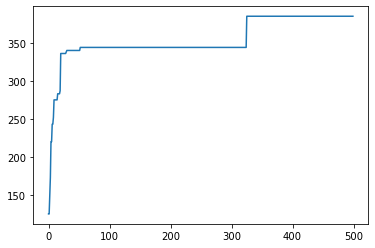

In [12]:
score = []
for i in range(500):
    population = selection(population)
    for j in range(len(population) // 2):
        parent1 = population[2 * j]
        parent2 = population[2 * j + 1]
        child1, child2 = crossover(parent1, parent2)
        population.append(mutation(child1))
        population.append(mutation(child2))
    score.append(fitnessFunction(population[0]))

plt.plot(score)
plt.show()

In [13]:
plainText = decrypt(population[0])
print(*plainText, sep = '\n')

pd stand today on the brink of a revolution in cryptography.
wqobabilistic encryption is the use of randomness in an encr
tdcure Sockets Layer (SSL), are cryptographic protocols that
skis document will detail a vulnerability in the ssh cryptog
jHT developed Kerberos to protect network services provided 
iNST announced a competition to develop a new cryptographic 
cjffie-Hellman establishes a shared secret that can be used 
wvblic-key cryptography refers to a cryptographic system req
ske keys used to sign the certificates had been stolen from 
pd hope this inspires others to work in this fascinating fie
